# 데이터 탐색 및 로지스틱 회귀

In [4]:
from tensorflow import keras

In [5]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [6]:
import matplotlib.pyplot as plt

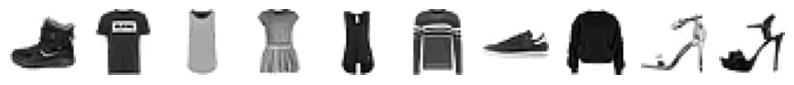

In [7]:
fig, axs = plt.subplots(1,10, figsize = (10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap = 'gray_r')
    axs[i].axis('off')
plt.show()

In [8]:
[train_target[i] for i in range(10)]

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]

In [9]:
import numpy as np
np.unique(train_target, return_counts = True) # 모두 동일

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [11]:
train_scaled = train_input / 255.0 # 정규화
train_scaled = train_scaled.reshape(-1,28*28) # 1차원으로 변환
print(train_scaled.shape)

(60000, 784)


In [13]:
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss = 'log', max_iter= 5, random_state= 42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs= -1)
np.mean(scores['test_score'])

0.8192833333333333

# 인공 신경망

In [14]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size= 0.2, random_state= 42)

In [15]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [17]:
dense = keras.layers.Dense(10, activation = 'softmax', input_shape = (784,))

In [18]:
model = keras.Sequential(dense)

In [19]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy') # 손실 함수 종류, 측정값 지정

In [20]:
model.fit(train_scaled, train_target, epochs = 3) # 훈련

Epoch 1/3
1500/1500 [==============================] - 3s 1ms/step - loss: 0.6038 - accuracy: 0.7967
Epoch 2/3
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4791 - accuracy: 0.8395
Epoch 3/3
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4558 - accuracy: 0.8479


In [21]:
model.evaluate(val_scaled, val_target) # 평가

375/375 [==============================] - 1s 1ms/step - loss: 0.4532 - accuracy: 0.8475


[0.45320093631744385, 0.8475000262260437]

# 심층신경망

In [23]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0 
train_scaled = train_scaled.reshape(-1,28*28) 

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size= 0.2, random_state= 42)

In [24]:
dense1 = keras.layers.Dense(100, activation = 'sigmoid', input_shape = (784,))
dense2 = keras.layers.Dense(10, activation = 'softmax')

In [26]:
model = keras.Sequential([dense1, dense2])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               78500     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [29]:
model = keras.Sequential([
    keras.layers.Dense(100, activation = 'sigmoid', input_shape = (784,), name = 'hidden'),
    keras.layers.Dense(10, activation = 'softmax', name = 'output')
], name = '패션 MINST 모델')

model.summary() # 모델과 달리 층의 이름은 영어 사용해야 됨

Model: "패션 MINST 모델"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [30]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation = 'sigmoid', input_shape = (784,)))
model.add(keras.layers.Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
model.fit(val_scaled, val_target, epochs = 3)

Epoch 1/3
375/375 [==============================] - 2s 2ms/step - loss: 0.8028 - accuracy: 0.7467
Epoch 2/3
375/375 [==============================] - 1s 3ms/step - loss: 0.5168 - accuracy: 0.8176
Epoch 3/3
375/375 [==============================] - 1s 2ms/step - loss: 0.4556 - accuracy: 0.8355


In [33]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape = (28,28)))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 100)               78500     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [34]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0 
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size= 0.2, random_state= 42)

In [37]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3953 - accuracy: 0.8579
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3596 - accuracy: 0.8724
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3378 - accuracy: 0.8812
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3206 - accuracy: 0.8869
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3095 - accuracy: 0.8910


In [38]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3213 - accuracy: 0.8868


[0.3212894797325134, 0.8868333101272583]

In [40]:
model.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2525 - accuracy: 0.9105
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2452 - accuracy: 0.9130
Epoch 3/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2413 - accuracy: 0.9127
Epoch 4/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2389 - accuracy: 0.9150
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2365 - accuracy: 0.9144


In [41]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.2929 - accuracy: 0.8967


[0.29292750358581543, 0.8967499732971191]

In [42]:
model.compile(optimizer = 'adagrad', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2320 - accuracy: 0.9165
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2310 - accuracy: 0.9172
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2303 - accuracy: 0.9175
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2298 - accuracy: 0.9178
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2294 - accuracy: 0.9172


In [43]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.2893 - accuracy: 0.8991


[0.2893180549144745, 0.8990833163261414]

In [44]:
model.compile(optimizer = 'rmsprop', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2927 - accuracy: 0.8965
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2883 - accuracy: 0.8981
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2809 - accuracy: 0.9012
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2744 - accuracy: 0.9032
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2690 - accuracy: 0.9067


In [45]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3472 - accuracy: 0.8954


[0.34723687171936035, 0.8954166769981384]

In [46]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape = (28,28)))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [47]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5208 - accuracy: 0.8164
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3946 - accuracy: 0.8571
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3548 - accuracy: 0.8716
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3270 - accuracy: 0.8803
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3069 - accuracy: 0.8877


In [49]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3678 - accuracy: 0.8673


[0.3677900731563568, 0.8672500252723694]

# 손실 곡선

In [50]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0 
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size= 0.2, random_state= 42)

In [51]:
def model_fn(a_layer = None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape = (28,28)))
    model.add(keras.layers.Dense(100, activation = 'relu'))
    
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation = 'softmax'))
    return model

In [52]:
model = model_fn()
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_11 (Dense)            (None, 100)               78500     
                                                                 
 dense_12 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 5, verbose = 0)

In [58]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


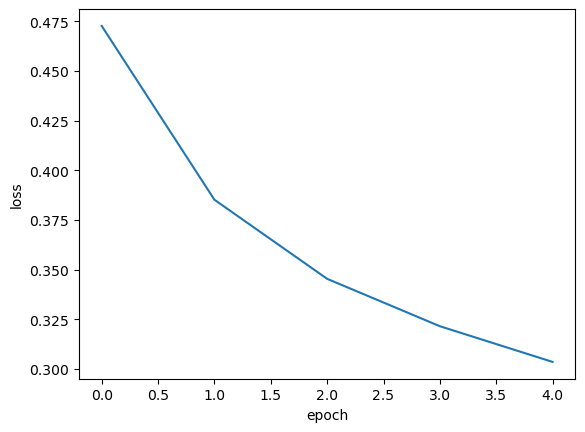

In [59]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

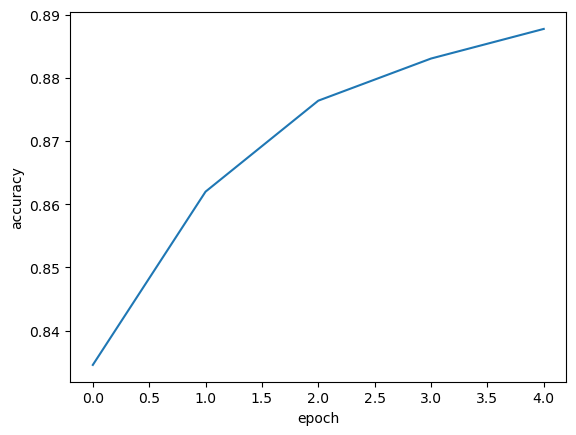

In [61]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

# 검증 손실

In [62]:
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 5, verbose = 0,
                    validation_data = (val_scaled, val_target))

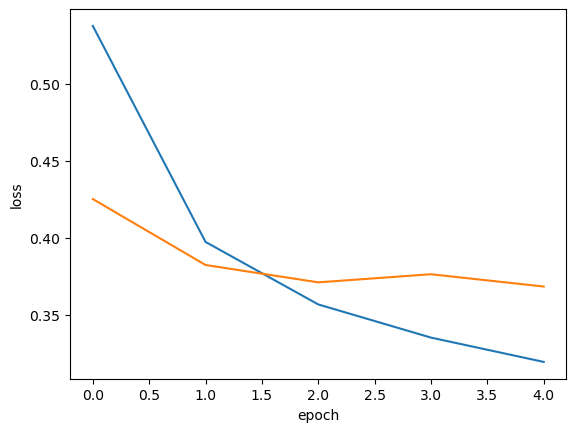

In [64]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

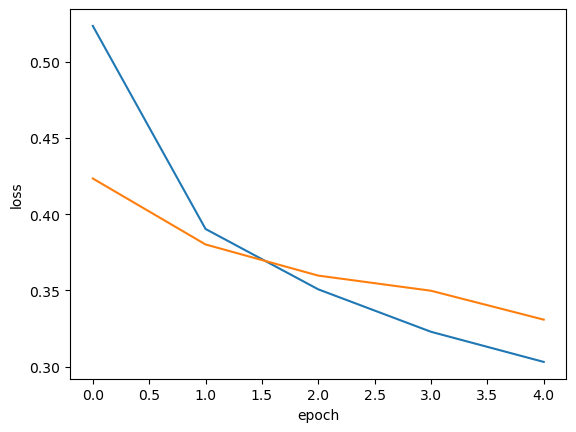

In [65]:
model = model_fn()
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 5, verbose = 0,
                    validation_data = (val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 드롭아웃

In [66]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_17 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_18 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


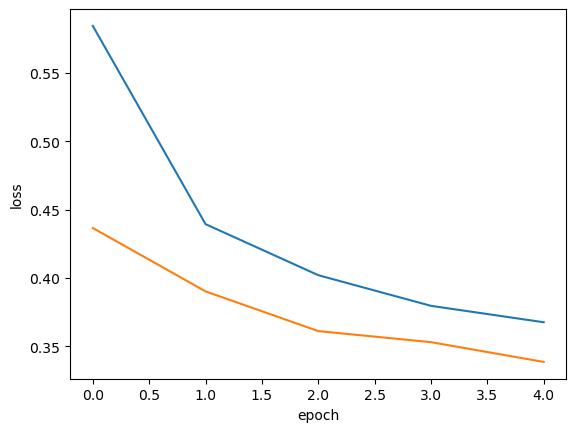

In [67]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 5, verbose = 0,
                    validation_data = (val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 모델 저장과 복원

In [68]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 5, verbose = 0,
                    validation_data = (val_scaled, val_target))

In [69]:
model.save_weights('model-weights.h5') # 훈련된 모델의 파라미터 저장

In [70]:
model.save('model-whole.h5') # 모델 구조와 파라미터 함께 저장

In [72]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weight.h5')

val_labels = np.argmax(model.predict(val_scaled), axis = 1)
np.mean(val_labels == val_target)

375/375 [==============================] - 1s 2ms/step


0.8845

In [73]:
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3434 - accuracy: 0.8763


[0.3433917164802551, 0.8762500286102295]

# 콜백

In [74]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only= True) # 에폭마다 모델을 저장, 가장 낮은 검증 점수를 만드는 모델로 저장
model.fit(train_scaled, train_target, epochs = 5, verbose = 0,
          validation_data = (val_scaled, val_target),
          callbacks = [checkpoint_cb])

In [75]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3604 - accuracy: 0.8676


[0.3603881001472473, 0.8675833344459534]

In [77]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only= True) # 에폭마다 모델을 저장, 가장 낮은 검증 점수를 만드는 모델로 저장
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights= True) # 조기종료를 위해 사용 / patience : 검증 점수가 향상되지 않아도 참을 횟수

history = model.fit(train_scaled, train_target, epochs = 5, verbose = 0, validation_data = (val_scaled, val_target),
          callbacks = [checkpoint_cb, early_stopping_cb])

In [80]:
print(early_stopping_cb.stopped_epoch) # ?

0


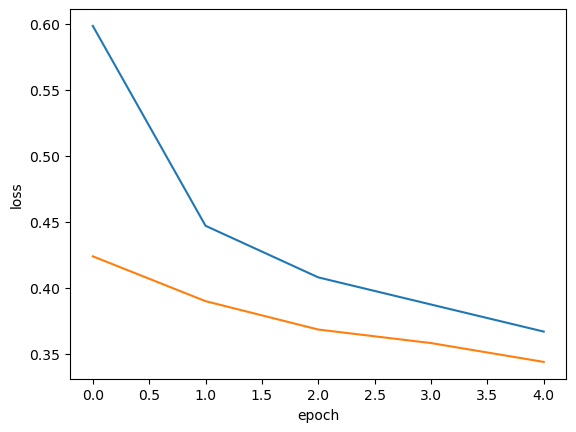

In [79]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [81]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3441 - accuracy: 0.8770


[0.34409040212631226, 0.8769999742507935]

# 합성곱 신경망

In [82]:
from tensorflow import keras

keras.layers.Conv2D(10, kernel_size = 3, activation = 'relu')

In [83]:
keras.layers.Conv2D(10, kernel_size = 3, activation = 'relu', padding = 'same', strides = 1)

In [84]:
keras.layers.MaxPooling2D(2)

In [85]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0 # 입력 이미지는 채널이 있어야 하기 때문에 reshape의 마지막에 차원을 추가 
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size= 0.2, random_state= 42)

In [86]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (28,28,1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_11 (Flatten)        (None, 3136)              0         
                                                                 
 dense_27 (Dense)            (None, 100)             

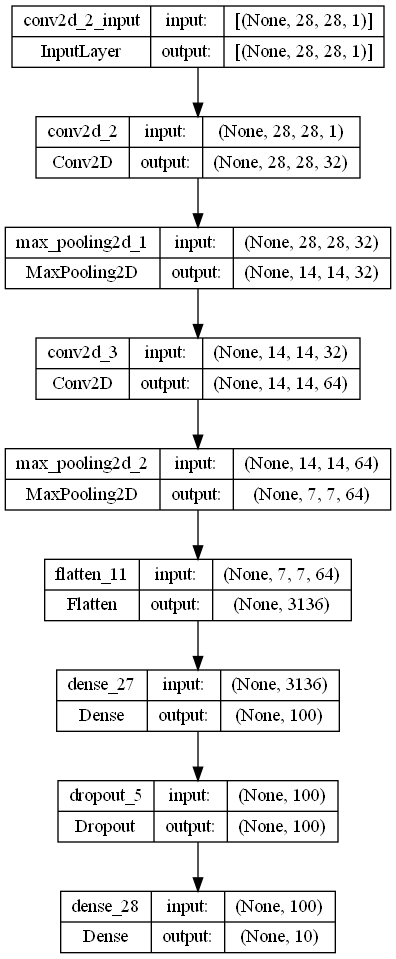

In [89]:
keras.utils.plot_model(model, show_shapes= True)

In [90]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only= True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights= True)

history = model.fit(train_scaled, train_target, epochs = 5, validation_data = (val_scaled, val_target),
                    callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/5
1500/1500 [==============================] - 50s 33ms/step - loss: 0.5380 - accuracy: 0.8080 - val_loss: 0.3388 - val_accuracy: 0.8770
Epoch 2/5
1500/1500 [==============================] - 46s 31ms/step - loss: 0.3558 - accuracy: 0.8739 - val_loss: 0.2852 - val_accuracy: 0.8947
Epoch 3/5
1500/1500 [==============================] - 55s 37ms/step - loss: 0.3044 - accuracy: 0.8912 - val_loss: 0.2551 - val_accuracy: 0.9057
Epoch 4/5
1500/1500 [==============================] - 53s 36ms/step - loss: 0.2716 - accuracy: 0.9016 - val_loss: 0.2401 - val_accuracy: 0.9108
Epoch 5/5
1500/1500 [==============================] - 49s 33ms/step - loss: 0.2457 - accuracy: 0.9102 - val_loss: 0.2279 - val_accuracy: 0.9134


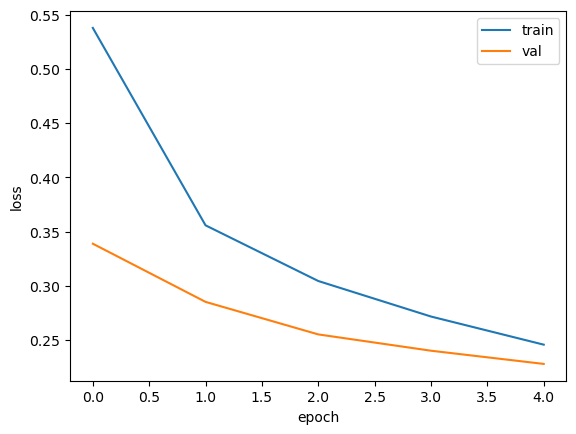

In [91]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [92]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 3s 8ms/step - loss: 0.2279 - accuracy: 0.9134


[0.22791792452335358, 0.9134166836738586]

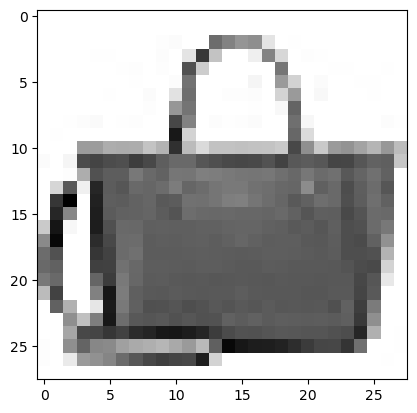

In [97]:
plt.imshow(val_scaled[0].reshape(28,28), cmap = 'gray_r') # plt에서 흑백 이미지에 차원 X, 따라서 (28,28,1)을 (28,28)로 변환

In [96]:
preds = model.predict(val_scaled[0:1]) 
# 입력값을 전달 할때 (28,28,1)이 아닌 (1,28,28,1)을 전달해야 하기 때문에, 배열 슬라이싱을 사용해 전체 차원 유지
print(preds)

1/1 [==============================] - 0s 45ms/step
[[6.6806337e-13 3.0796011e-18 1.7272932e-13 5.3146337e-14 4.0014121e-13
  2.9905464e-13 1.9217470e-11 9.6961614e-12 1.0000000e+00 2.3650055e-12]]


<BarContainer object of 10 artists>

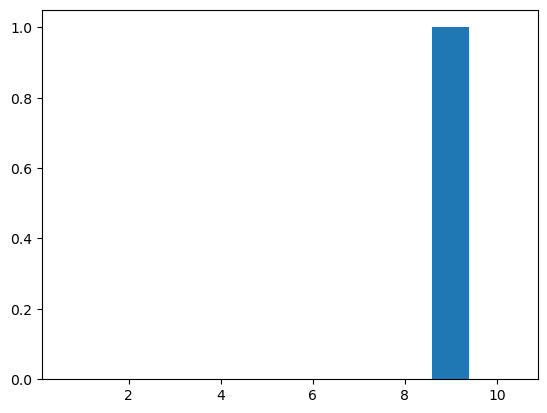

In [106]:
plt.bar(range(1,11), preds[0])

In [107]:
test_scaled = test_input.reshape(-1, 28,28, 1) / 255.0
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 3s 10ms/step - loss: 0.2474 - accuracy: 0.9093


[0.24739548563957214, 0.9093000292778015]

# 가중치 시각화

In [44]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5')

In [2]:
model.layers

In [4]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape) # 첫 번째 층의 가중치와 절편 크기 출력

(3, 3, 1, 32) (32,)


In [5]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.01023578 0.20282044


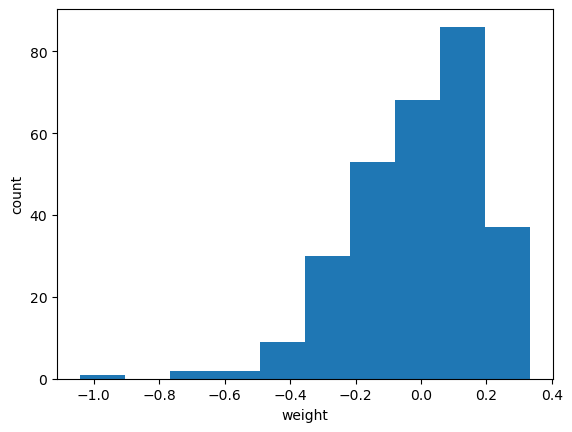

In [6]:
import matplotlib.pyplot as plt

plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

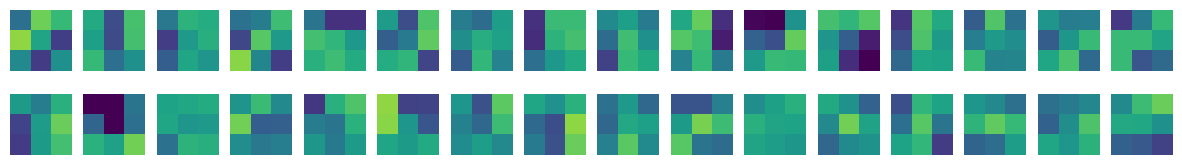

In [8]:
# 32개의 커널을 16개씩 두 줄에 출력

fig, axs = plt.subplots(2, 16, figsize = (15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(conv_weights[:,:,0,i*16 + j], vmin = -0.5, vmax = 0.5)
        axs[i,j].axis('off')
plt.show()

In [9]:
no_training_model = keras.Sequential()

no_training_model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (28,28,1)))

In [12]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [13]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

-0.00075517345 0.08097121


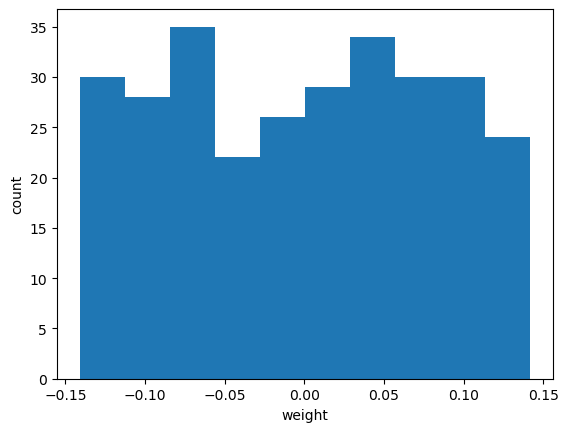

In [14]:
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

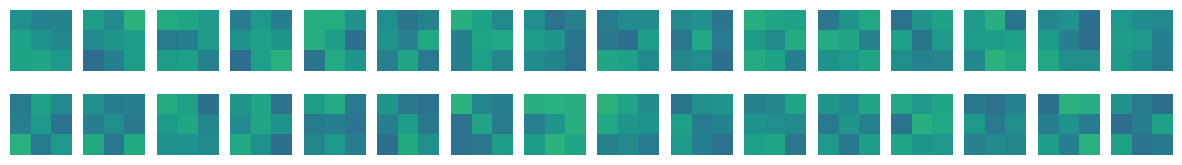

In [15]:
fig, axs = plt.subplots(2, 16, figsize = (15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(no_training_weights[:,:,0,i*16 + j], vmin = -0.5, vmax = 0.5)
        axs[i,j].axis('off')
plt.show()

# 함수형 API

In [36]:
dense1 = keras.layers.Dense(100, activation = 'sigmoid')
dense2 = keras.layers.Dense(10, activation = 'softmax')

In [43]:
inputs = keras.Input(shape = (784,))
hidden = dense1(inputs)
outputs = dense2(hidden)
model = keras.Model(inputs, outputs)

In [45]:
print(model.input) # best-model 호출

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_2_input'), name='conv2d_2_input', description="created by layer 'conv2d_2_input'")


In [46]:
conv_acti = keras.Model(model.input, model.layers[0].output)

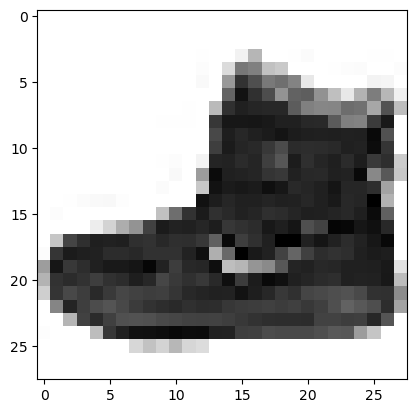

In [40]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

plt.imshow(train_input[0], cmap = 'gray_r')
plt.show()

In [47]:
inputs = train_input[0:1].reshape(-1,28,28,1) / 255.0
feature_maps = conv_acti.predict(inputs)
print(feature_maps.shape)

1/1 [==============================] - 0s 121ms/step
(1, 28, 28, 32)


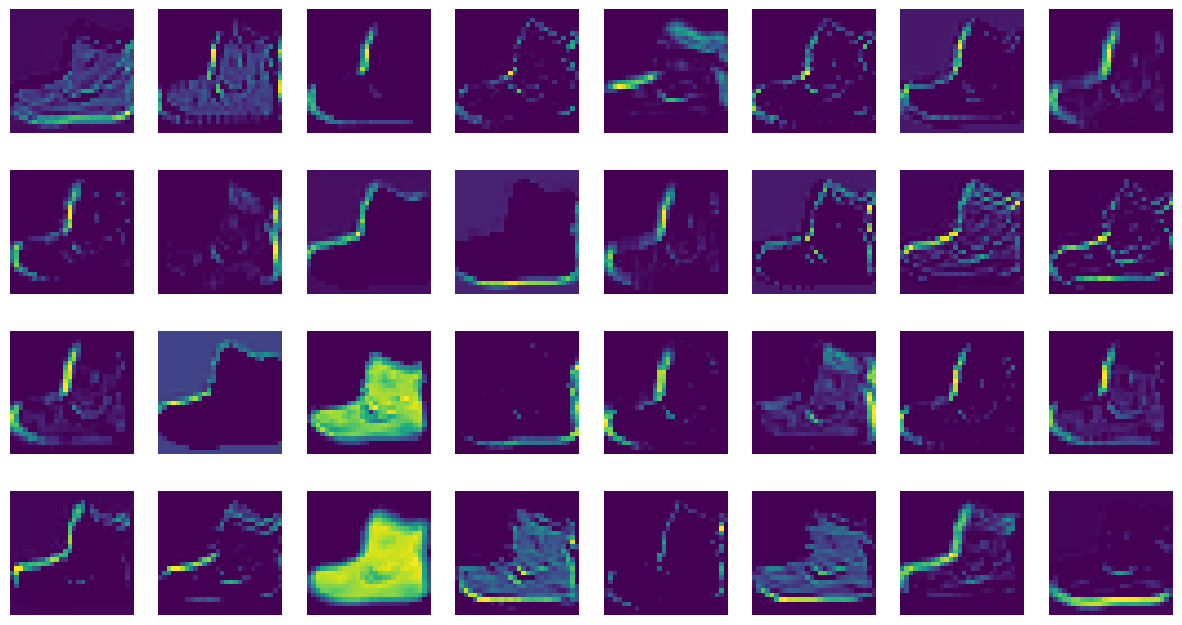

In [48]:
# 특성맵 시각화

fig, axs = plt.subplots(4, 8, figsize = (15,8))
for i in range(4):
    for j in range(8):
        axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i,j].axis('off')
plt.show()

In [49]:
conv2_acti = keras.Model(model.input, model.layers[2].output)
inputs = train_input[0:1].reshape(-1,28,28,1) / 255.0
feature_maps = conv2_acti.predict(inputs)
print(feature_maps.shape)

1/1 [==============================] - 0s 74ms/step
(1, 14, 14, 64)


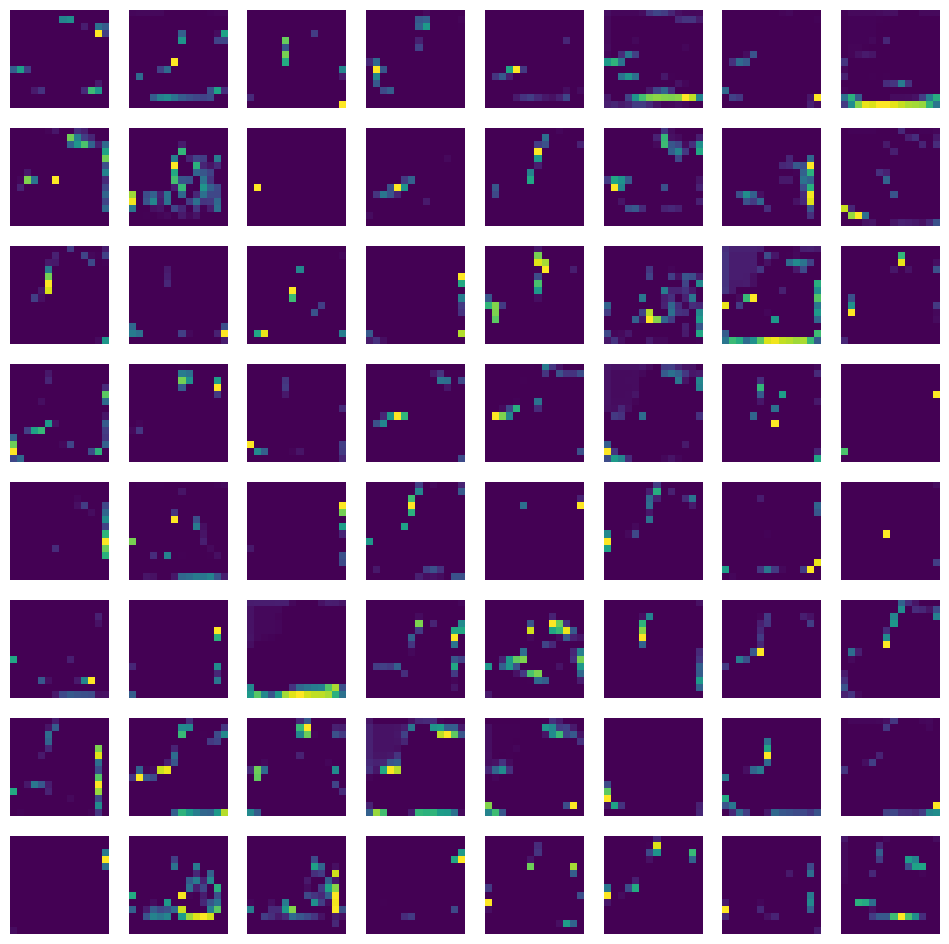

In [51]:
fig, axs = plt.subplots(8,8,figsize = (12,12))

for i in range(8):
    for j in range(8):
        axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i,j].axis('off')
plt.show()